## Importation des bibliothèques nécessaires pour notre travail 

In [36]:
#Pour importer les données
import pandas as pd
# Pour la recherche des valeurs manquantes et pour les graphiques 
import matplotlib.pyplot as plt
import seaborn as sns


### Importer le fichier train 

In [37]:
df = pd.read_csv('../data/train.csv')

## Impression des premieres lignes

In [9]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


## Nombre de personnes de sexes feminins et masculins

In [10]:
nf = df[df['Sex']== 'female'].shape[0]

In [11]:
print(f'Nombre de femmes de sexe feminin : {nf}')

Nombre de femmes de sexe feminin : 314


In [13]:
nh = df[df['Sex']== 'male'].shape[0]

In [14]:
print(f'Nombre d\'hommes  : {nh}')

Nombre d'hommes  : 577


## Nombre de personnes donc l'âge inferieur à 20 Ans 

In [15]:
age_inferieur = df[df['Age']<20].shape[0]

In [16]:
print(f"Nombre de personnes donc l'age est inferieur a 20 ans : {age_inferieur}")

Nombre de personnes donc l'age est inferieur a 20 ans : 164


## La moyenne des ages 

In [22]:
moyenne_age = df['Age'].mean()

In [23]:
print(f"La moyenne des ages est : {moyenne_age}")

La moyenne des ages est : 29.69911764705882


# Nettoyages des données

## Recherches des valeurs manquantes dans le dataset 

In [24]:
# Vérifier les valeurs manquantes
print(df.isnull().sum())

# Afficher les lignes avec des valeurs manquantes
missing_data = df[df.isnull().any(axis=1)]
print(missing_data)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
     PassengerId  Survived  Pclass                                      Name  \
0              1         0       3                   Braund, Mr. Owen Harris   
2              3         1       3                    Heikkinen, Miss. Laina   
4              5         0       3                  Allen, Mr. William Henry   
5              6         0       3                          Moran, Mr. James   
7              8         0       3            Palsson, Master. Gosta Leonard   
..           ...       ...     ...                                       ...   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
886          887         0       2     

## Rechercher les valeurs abberantes 

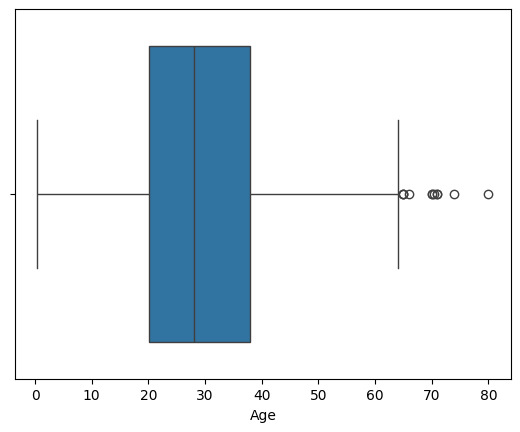

     PassengerId  Survived  Pclass                                  Name  \
33            34         0       2                 Wheadon, Mr. Edward H   
54            55         0       1        Ostby, Mr. Engelhart Cornelius   
96            97         0       1             Goldschmidt, Mr. George B   
116          117         0       3                  Connors, Mr. Patrick   
280          281         0       3                      Duane, Mr. Frank   
456          457         0       1             Millet, Mr. Francis Davis   
493          494         0       1               Artagaveytia, Mr. Ramon   
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   
672          673         0       2           Mitchell, Mr. Henry Michael   
745          746         0       1          Crosby, Capt. Edward Gifford   
851          852         0       3                   Svensson, Mr. Johan   

      Sex   Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
33   male  66.0    

In [27]:


# Visualiser les outliers avec un boxplot
sns.boxplot(x=df['Age'])
plt.show()

# Calculer les limites des outliers pour la colonne 'Age'
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1  # Intervalle interquartile
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Afficher les lignes avec des outliers
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
print(outliers)


In [28]:
# Vérifier les âges négatifs ou irréalistes
inconsistent_age = df[df['Age'] < 0]
print(inconsistent_age)

# Vérifier les incohérences dans la colonne 'Sex'
inconsistent_sex = df[~df['Sex'].isin(['male', 'female'])]
print(inconsistent_sex)


Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


In [29]:
# Résumé statistique
print(df.describe())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


## Distribution de l'age 

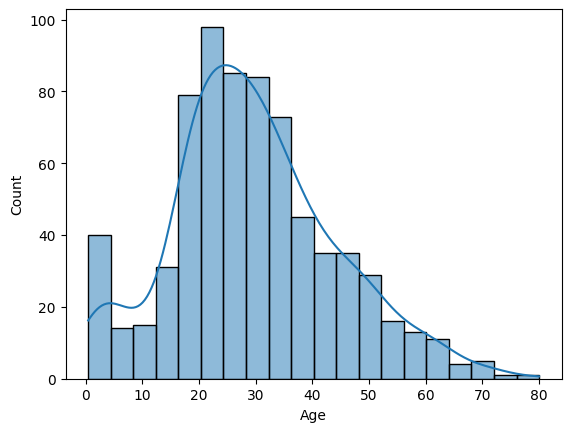

In [30]:
sns.histplot(df['Age'], kde=True)
plt.show()


## Relation entre Age et Fare

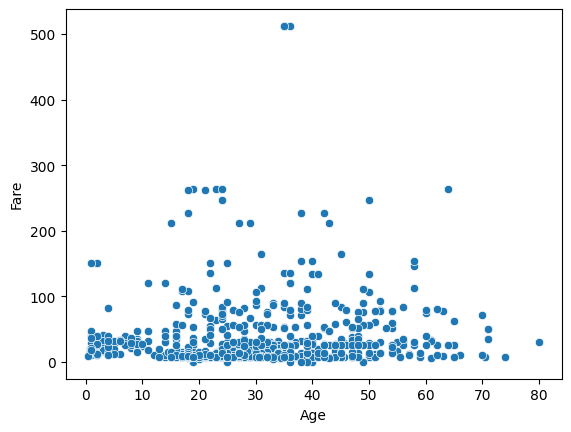

In [31]:
sns.scatterplot(x='Age', y='Fare', data=df)
plt.show()


## suppression des  lignes où la variable Age est manquante.

In [38]:
data = df

In [39]:
data.dropna(subset=['Age'], inplace=True)


## Imputation des valeurs manquantes par la moyenne ou la médiane.

In [40]:
data['Age'].fillna(data['Age'].mean(), inplace=True)


/var/folders/2j/v6s4w_g11rv9t26dj5k5fjgm0000gn/T/ipykernel_32350/732603640.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)


## Vérification et normalisation des classes de billets si elles contiennent des incohérences

In [41]:
data['Pclass'].unique()

array([3, 1, 2])

In [42]:
data['Pclass'] = data['Pclass'].astype('int')

# Analyse univariée

## Exploration des distributions 

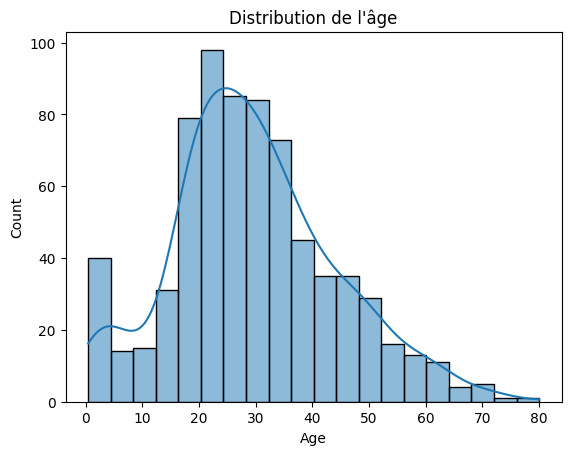

In [43]:
# Exemple pour la variable 'Age'
sns.histplot(data['Age'], kde=True)
plt.title("Distribution de l'âge")
plt.show()

# Analyse bivariée

## Relations entre variables 

### Taux de survie par sexe

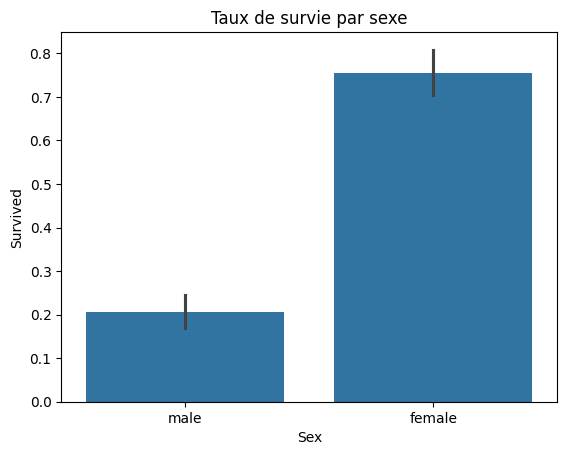

In [44]:
sns.barplot(x='Sex', y='Survived', data=data)
plt.title("Taux de survie par sexe")
plt.show()


### Taux de survie par classe sociale

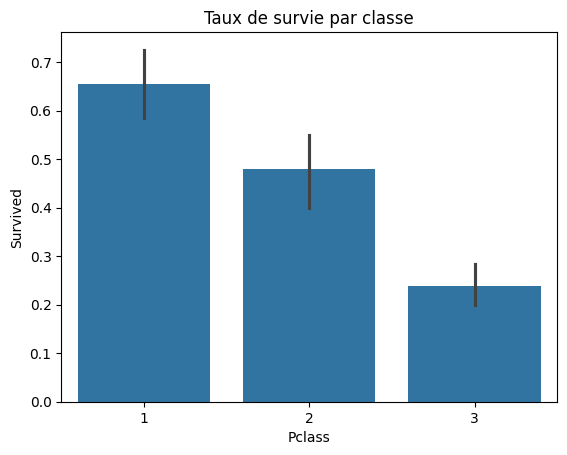

In [45]:
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title("Taux de survie par classe")
plt.show()

### Influence de l’âge sur la survie

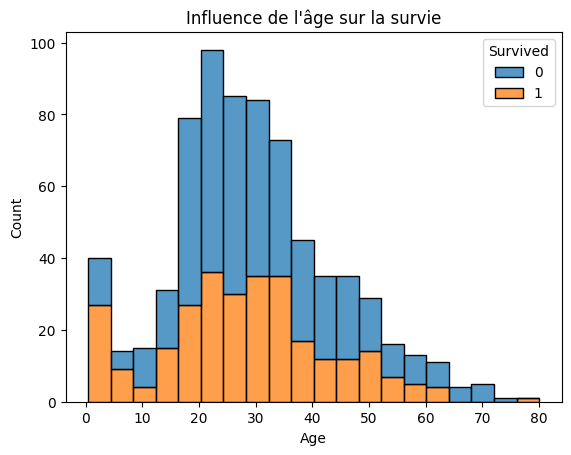

In [46]:
sns.histplot(data=data, x='Age', hue='Survived', multiple='stack')
plt.title("Influence de l'âge sur la survie")
plt.show()